In [34]:
from rl_functions import Maze
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
GAME_HEIGHT = 600
GAME_WIDTH = 600

NUMBER_OF_TILES = 25

level = [
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
    "XPXXXXXXXX          XXXXX",
    "X XXXXXXXX  XXXXXX  XXXXX",
    "X      XXX  XXXXXX  XXXXX",
    "X      XXX  XXX        XX",
    "XXXXXX  XX  XXX        XX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "XXXXXX  XX  XXXXXX  XXXXX",
    "X  XXX      XXXXXXXXXXXXX",
    "X  XXX  XXXXXXXXXXXXXXXXX",
    "X         XXXXXXXXXXXXXXX",
    "X             XXXXXXXXXXX",
    "XXXXXXXXXXX      XXXXX  X",
    "XXXXXXXXXXXXXXX  XXXXX  X",
    "XXX  XXXXXXXXXX         X",
    "XXX                     X",
    "XXX         XXXXXXXXXXXXX",
    "XXXXXXXXXX  XXXXXXXXXXXXX",
    "XXXXXXXXXX              X",
    "XX   XXXXX              X",
    "XX   XXXXXXXXXXXXX  XXXXX",
    "XX    XXXXXXXXXXXX  XXXXX",
    "XX        XXXX          X",
    "XXXX                    X",
    "XXXXXXXXXXXXXXXXXXXXXXXXX",
]

env = Maze(
    level,
    goal_pos=(23, 23),
    MAZE_HEIGHT=GAME_HEIGHT,
    MAZE_WIDTH=GAME_WIDTH,
    SIZE=NUMBER_OF_TILES,
)
env.solve()


In [36]:
def plot_policy(probs_or_qvals):
   
    action_meanings = {0: 'L', 1: 'U', 2: 'R', 3: 'D'}
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    max_prob_actions = probs_or_qvals.argmax(axis=-1)
    probs_copy = max_prob_actions.copy().astype(np.object)
    for key in action_meanings:
        probs_copy[probs_copy == key] = action_meanings[key]
    sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False, cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2, ax=axes[0])
    axes[0].axis('off')
    axes[1].axis('off')
    plt.suptitle("Policy", size=24)
    plt.tight_layout()

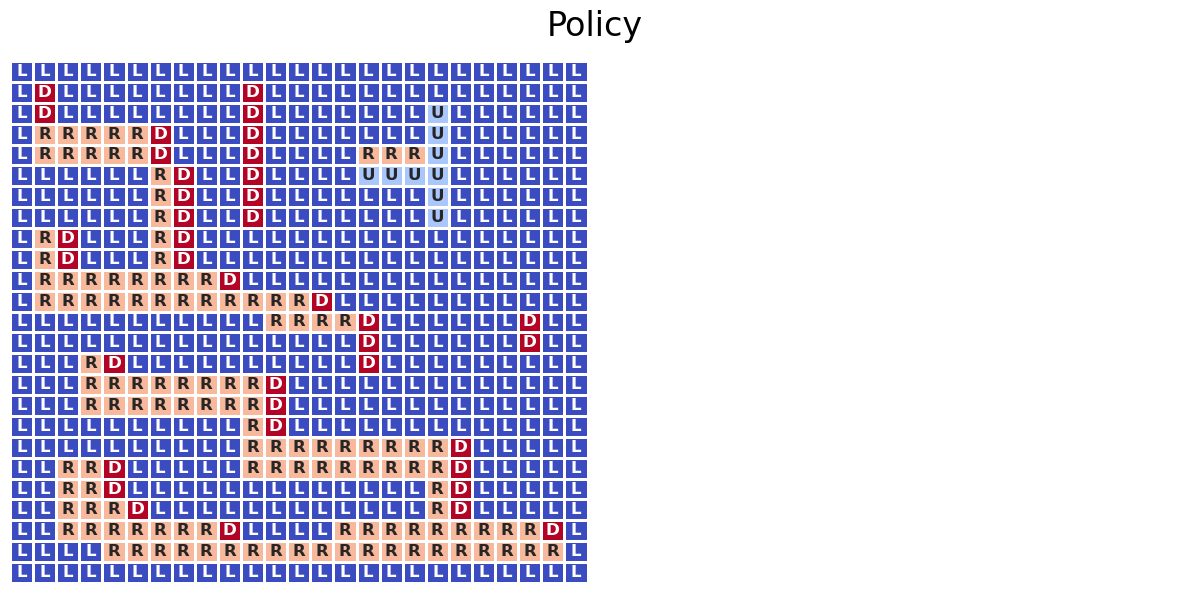

In [37]:
plot_policy(env.policy_probs)

In [52]:
def plot_values(state_values):
    f= plt.figure(figsize=(12, 12))
    sns.heatmap(state_values, annot=True, fmt=".1f", cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 8}, linewidths=2)
    plt.tight_layout()
    plt.axis('off')

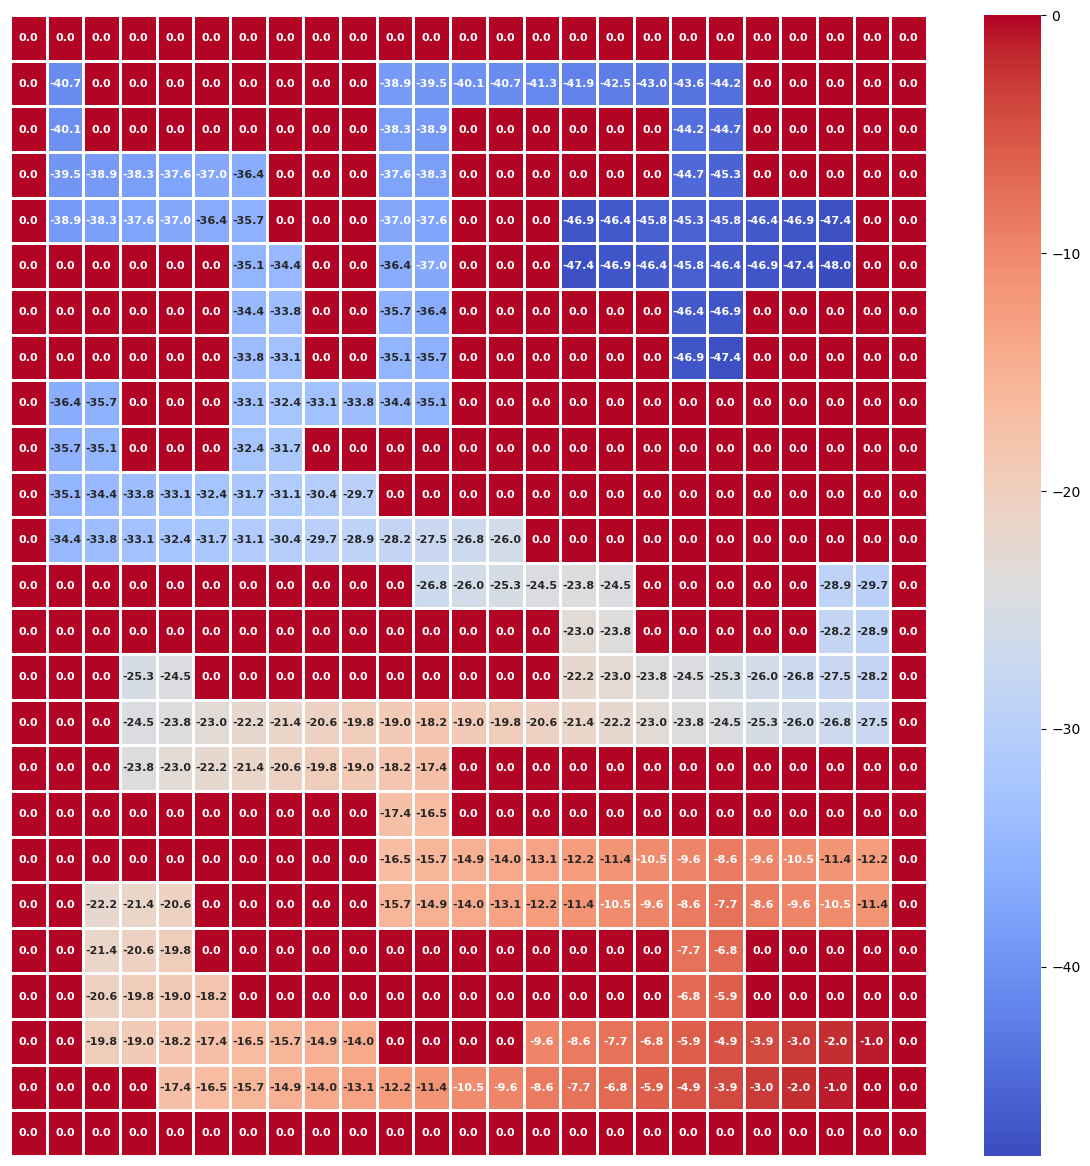

In [53]:
plot_values(env.state_values)